<a href="https://colab.research.google.com/github/Apoorva2409/Apoorva2409/blob/main/HandwrittenDigitsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
%matplotlib inline 

In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
digit_mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test)=digit_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


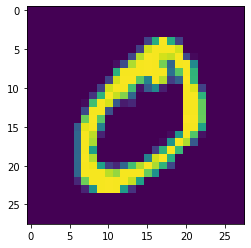

In [5]:
plt.imshow(X_train_full[1])

In [6]:
y_train_full[1]

0

**Data Normalization**

In [7]:
X_train_n=X_train_full/255.
X_test_n=X_test/255.

**spliting data into test and validation**

In [8]:
X_valid,X_train=X_train_n[:6000],X_train_n[6000:]
y_valid,y_train=y_train_full[:6000],y_train_full[6000:]
X_test=X_test_n

In [9]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [10]:
np.random.seed(42)#used to replicate same result everytime
tf.random.set_seed(42)

In [30]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation='softmax'))


In [31]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 200)               157000    
                                                                 
 dense_8 (Dense)             (None, 100)               20100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


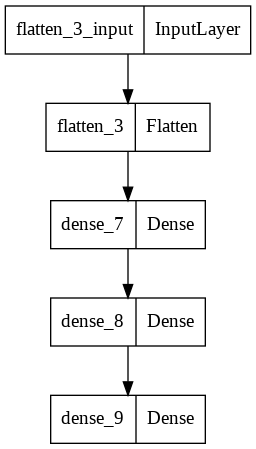

In [32]:
import pydot
keras.utils.plot_model(model)


In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [34]:
model_history=model.fit(X_train,y_train,epochs=60,
                        validation_data=(X_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.6436 - accuracy: 0.8296 - val_loss: 0.3199 - val_accuracy: 0.9107
Epoch 2/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2996 - accuracy: 0.9143 - val_loss: 0.2544 - val_accuracy: 0.9275
Epoch 3/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2462 - accuracy: 0.9293 - val_loss: 0.2193 - val_accuracy: 0.9380
Epoch 4/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2107 - accuracy: 0.9399 - val_loss: 0.1901 - val_accuracy: 0.9478
Epoch 5/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1844 - accuracy: 0.9477 - val_loss: 0.1712 - val_accuracy: 0.9525
Epoch 6/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1644 - accuracy: 0.9529 - val_loss: 0.1554 - val_accuracy: 0.9563
Epoch 7/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1482 - accuracy: 0.9584 - val_loss: 0.1410 - val_accuracy:

In [35]:
print(model_history.history)
print(model_history.params,'\n')


{'loss': [0.6435664296150208, 0.2995857894420624, 0.24616920948028564, 0.21068532764911652, 0.1844361424446106, 0.16438841819763184, 0.14821504056453705, 0.13492678105831146, 0.12356778234243393, 0.11353089660406113, 0.1049271672964096, 0.09748135507106781, 0.09048637002706528, 0.08436892926692963, 0.07907209545373917, 0.07408276200294495, 0.06949292123317719, 0.06493458151817322, 0.06135927513241768, 0.05759361386299133, 0.05453779175877571, 0.05142472684383392, 0.048720989376306534, 0.04582483693957329, 0.04339884966611862, 0.040940701961517334, 0.03884701430797577, 0.03699394688010216, 0.03490518406033516, 0.03311900421977043, 0.03151305392384529, 0.029887596145272255, 0.028370646759867668, 0.0270277988165617, 0.025476699694991112, 0.02428683079779148, 0.023318827152252197, 0.02198190614581108, 0.02095836214721203, 0.019884023815393448, 0.018974067643284798, 0.018243232741951942, 0.017208127304911613, 0.016496647149324417, 0.015659797936677933, 0.01506615336984396, 0.014342450536787

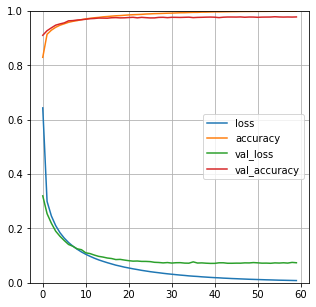

In [37]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(5,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [38]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0758 - accuracy: 0.9778


[0.07575652748346329, 0.9778000116348267]

In [40]:
X_new=X_test[:5]
y_pred=model.predict(X_new)
y_pred

array([[1.6931963e-07, 8.0707956e-09, 6.0516254e-06, 5.3317548e-05,
        2.8918992e-09, 5.8416884e-08, 3.0385265e-13, 9.9993491e-01,
        1.3141652e-06, 4.1445473e-06],
       [5.2356974e-10, 2.9459356e-05, 9.9997032e-01, 2.0445323e-07,
        4.8075307e-15, 3.5302874e-09, 2.9501384e-09, 9.7966221e-13,
        7.9358742e-10, 6.3470873e-16],
       [1.2729379e-08, 9.9946851e-01, 4.7374091e-05, 2.7086744e-06,
        7.9009886e-05, 1.0018216e-06, 8.2112780e-07, 1.6157106e-04,
        2.3830790e-04, 6.9084405e-07],
       [9.9999464e-01, 2.8632444e-10, 7.2075619e-07, 9.8123798e-10,
        4.7806126e-10, 7.4956290e-09, 1.2792179e-07, 2.5329132e-06,
        4.7927368e-10, 2.0025627e-06],
       [3.9407658e-07, 2.1516220e-09, 2.3715030e-08, 1.8740008e-11,
        9.9988437e-01, 2.2287421e-09, 1.5511172e-07, 4.2391475e-06,
        2.9346833e-08, 1.1074425e-04]], dtype=float32)

In [42]:
y_predclass=np.argmax(model.predict(X_new),axis=-1)
print('Digits classified for unseen data : ',y_predclass,'\n')

Digits classified for unseen data :  [7 2 1 0 4] 



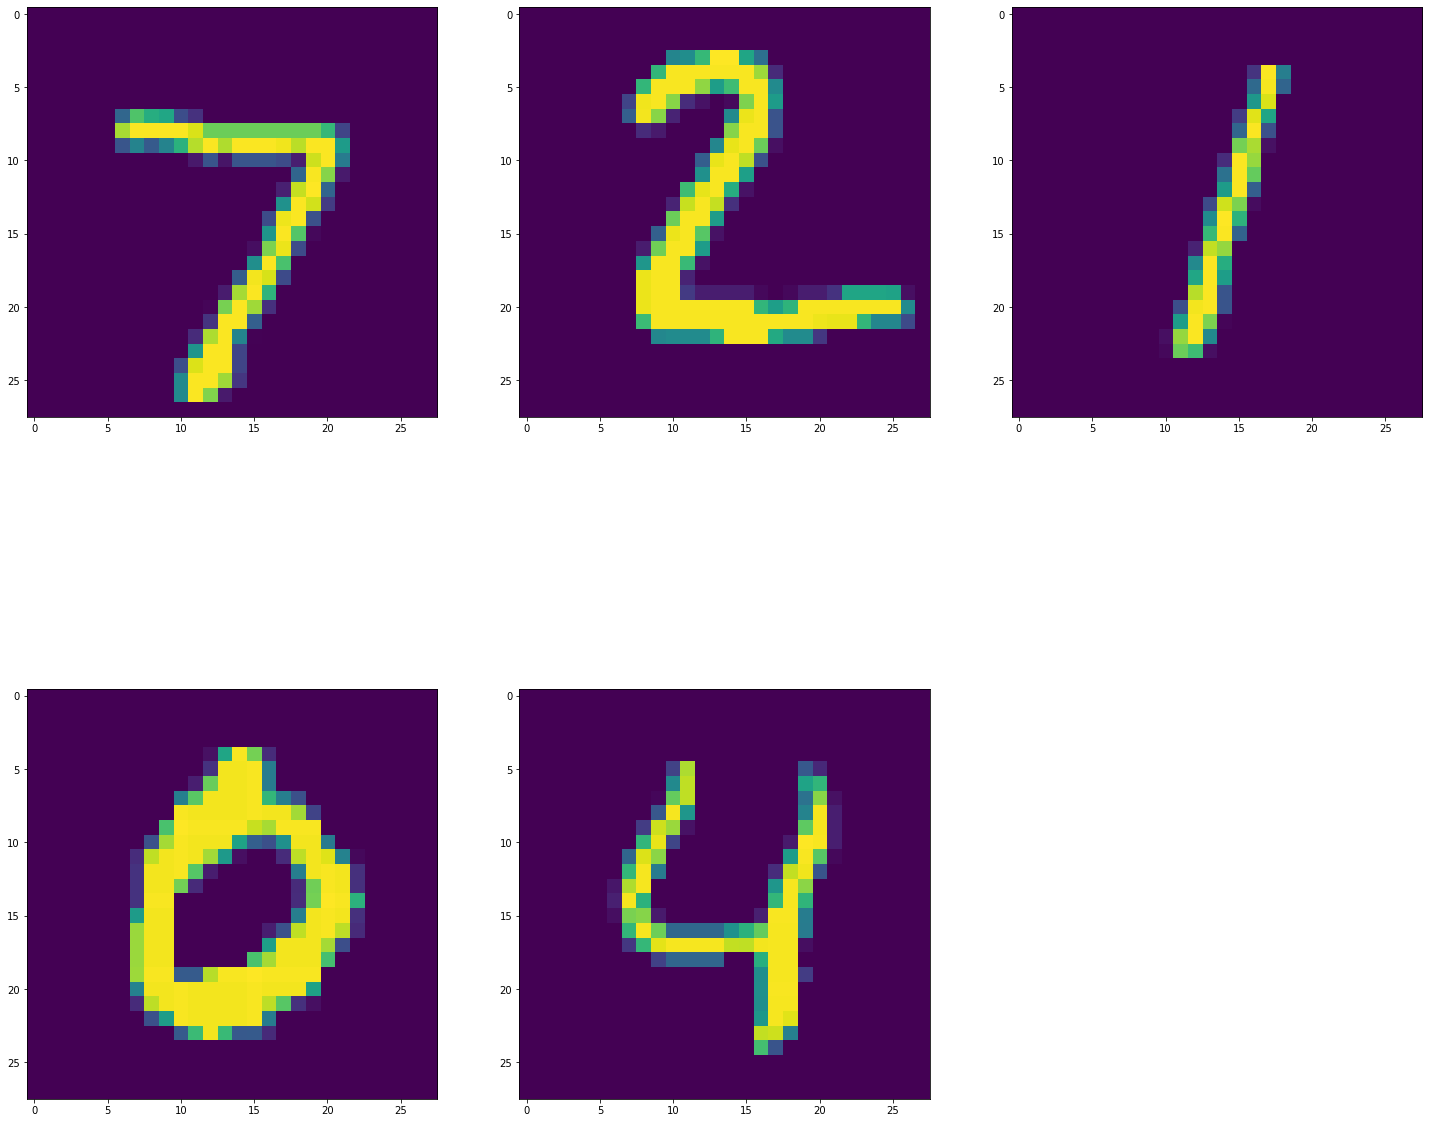

Digits classified for the same data points :  [7 2 1 0 4]


In [43]:
r=range(0,5)
j=1
plt.figure(figsize=(25,23))
for i in r:
    plt.subplot(2,3,j)
    plt.imshow(X_test[i])
    j+=1
plt.show()
print('Digits classified for the same data points : ',y_predclass)